# RESHAPING AND PIVTOING

There are multiple ways to reshape a dataframe. We can choose the one that best fits the task at hand. The functions to reshape a dataframe:

 1. Melt

 2. Stack and unstack

 3. Pivot

In [ ]:
#importing numpy and pandas:
import pandas as pd
import numpy as np


##1.MELT
Melt is used to convert wide dataframes to narrow ones. What I mean by wide is a dataframe with a high number of columns. Some dataframes are structured in a way that consecutive measurements or variables are represented as columns. In some cases, representing these columns as rows may fit better to our task.

frame : DataFrame

**id_vars[tuple, list, or ndarray, optional] :** Column(s) to use as identifier variables.

**value_vars[tuple, list, or ndarray, optional]:** Column(s) to unpivot. If not specified, uses all columns that are not set as id_vars.

**var_name[scalar]:** Name to use for the ‘variable’ column. If None it uses frame.columns.name or ‘variable’.

**value_name[scalar, default ‘value’]**: Name to use for the ‘value’ column.

**col_level[int or string, optional]**: If columns are a MultiIndex then use this level to melt.

### EXAMPLE

In [ ]:
df1 = pd.DataFrame({'city':['A','B','C'],
                   'day1':[22,25,28],
                   'day2':[10,14,13],
                   'day3':[25,22,26],
                   'day4':[18,15,17],
                   'day5':[12,14,18]})
df1

,city,day1,day2,day3,day4,day5
0,A,22,10,25,18,12
1,B,25,14,22,15,14
2,C,28,13,26,17,18


In [ ]:
df1.melt(id_vars=['city'])

,city,variable,value
0,A,day1,22
1,B,day1,25
2,C,day1,28
3,A,day2,10
4,B,day2,14
5,C,day2,13
6,A,day3,25
7,B,day3,22
8,C,day3,26
9,A,day4,18


## 2.STACK - UNSTACK
Stack function kind of increases the index level of the dataframe. What I mean by increasing the level is:

If dataframe has a simple column index, stack returns a series whose indices consist of row-column pairs of original dataframe.

If dataframe has multi-level index, stack increases the index level.

df1 has 3 rows and 6 columns with simple integer column index. If stack function is applied to df1, it will return a series with 3 x 6 = 18 rows. The index of the series will be [(0, ‘city’), (0, ‘day1’), … , (2, ‘day5’)].

### EXAMPLE

In [ ]:
df1.stack()

0  city     A
   day1    22
   day2    10
   day3    25
   day4    18
   day5    12
1  city     B
   day1    25
   day2    14
   day3    22
   day4    15
   day5    14
2  city     C
   day1    28
   day2    13
   day3    26
   day4    17
   day5    18
dtype: object

In [ ]:
df1.shape
(3,6)
df1.stack().shape
(18,)
df1.stack().index[0] #multilevel index

(0, 'city')

**Unstack** is just the opposite of stack. If we apply unstack to the stacked dataframe, we will get back the original dataframe:

 Let’s create a dataframe with multi-level index:

In [ ]:
tuples = [('A',1),('A',2),('A',3),('B',1),('C',2)]
index = pd.MultiIndex.from_tuples(tuples, names=['first','second'])
df2 = pd.DataFrame(np.random.randint(10, size=(5,2)), 
                   index=index, columns=['column_x', 'column_y'])
df2

column_x  column_y
first second                    
A     1              7         1
      2              2         1
      3              7         2
B     1              2         8
C     2              0         2

In [ ]:
#If we apply stack function on this dataframe, the level of index will be increased:

df_stacked = df2.stack().to_frame()
df_stacked

0
first second            
A     1      column_x  7
             column_y  1
      2      column_x  2
             column_y  1
      3      column_x  7
             column_y  2
B     1      column_x  2
             column_y  8
C     2      column_x  0
             column_y  2

In [ ]:
len(df_stacked.index.levels)

3

In [ ]:
len(df2.index.levels)

2

In [ ]:
df_stacked.unstack()

0         
             column_x column_y
first second                  
A     1             7        1
      2             2        1
      3             7        2
B     1             2        8
C     2             0        2

In [ ]:
df_stacked.unstack().index

MultiIndex([('A', 1),
            ('A', 2),
            ('A', 3),
            ('B', 1),
            ('C', 2)],
           names=['first', 'second'])

In [ ]:
df2.index

MultiIndex([('A', 1),
            ('A', 2),
            ('A', 3),
            ('B', 1),
            ('C', 2)],
           names=['first', 'second'])

## 3.PIVOT

The pivot function is used to create a new derived table out of a given one. Pivot takes 3 arguements with the following names: index, columns, and values. As a value for each of these parameters you need to specify a column name in the original table. Then the pivot function will create a new table, whose row and column indices are the unique values of the respective parameters. The cell values of the new table are taken from column given as the values parameter.

### EXAMPLE

In [ ]:
np.random.seed(100)

df=pd.DataFrame({"Date":pd.Index(pd.date_range(start='2/2/2019',periods=3)).repeat(3), "Class":["1A","2B","3C","1A","2B","3C","1A","2B","3C"], "Numbers":np.random.randn(9)})

df['Numbers2'] = df['Numbers'] * 2

df

,Date,Class,Numbers,Numbers2
0,2019-02-02,1A,-1.749765,-3.499531
1,2019-02-02,2B,0.342680,0.685361
2,2019-02-02,3C,1.153036,2.306072
3,2019-02-03,1A,-0.252436,-0.504872
4,2019-02-03,2B,0.981321,1.962642
5,2019-02-03,3C,0.514219,1.028438
6,2019-02-04,1A,0.221180,0.442359
7,2019-02-04,2B,-1.070043,-2.140087
8,2019-02-04,3C,-0.189496,-0.378992


In [ ]:
df.pivot(index='Date', columns='Class', values='Numbers')

Class,1A,2B,3C
Date,,,
2019-02-02,-1.749765,0.342680,1.153036
2019-02-03,-0.252436,0.981321,0.514219
2019-02-04,0.221180,-1.070043,-0.189496


In [ ]:
#Let us look at what would happen if we do not declare values parameter.
df.pivot(index='Date', columns='Class')

Numbers                      Numbers2                    
Class             1A        2B        3C        1A        2B        3C
Date                                                                  
2019-02-02 -1.749765  0.342680  1.153036 -3.499531  0.685361  2.306072
2019-02-03 -0.252436  0.981321  0.514219 -0.504872  1.962642  1.028438
2019-02-04  0.221180 -1.070043 -0.189496  0.442359 -2.140087 -0.378992

If we do not specify values parameter, pandas would create all the various possible views while taking all column names apart from what were specified as index and columns as above. Hence, for a big dataset having multiple columns, it is suggested to specify value parameter as well.

There is, however, another way to extract information about one column using the above code and tweaking it a little. It would be as follows.

In [ ]:
df.pivot(index='Date', columns='Class')['Numbers']

Class,1A,2B,3C
Date,,,
2019-02-02,-1.749765,0.342680,1.153036
2019-02-03,-0.252436,0.981321,0.514219
2019-02-04,0.221180,-1.070043,-0.189496


# **EXERCISE-1**

Apply reshaping and pivoting in the given dataset .

In [ ]:
# import pandas module
import pandas as pd
  
# making dataframe
df = pd.read_csv("https://drive.google.com/uc?id=1P7IAtrzridKSYxoL5gUl6bqE1uojQSIZ")
  
# it was print the first 5-rows
df 

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24.0,C,26.0,7-0,231.0,Kansas,947276.0


## Q1. MELT
Reshape dataframe from wide format to long format.

In [ ]:
df_melt = df.melt(id_vars =['Name', 'Team']) 
print(df_melt.head(10))

            Name            Team variable value
0  Avery Bradley  Boston Celtics   Number   0.0
1    Jae Crowder  Boston Celtics   Number  99.0
2   John Holland  Boston Celtics   Number  30.0
3    R.J. Hunter  Boston Celtics   Number  28.0
4  Jonas Jerebko  Boston Celtics   Number   8.0
5   Amir Johnson  Boston Celtics   Number  90.0
6  Jordan Mickey  Boston Celtics   Number  55.0
7   Kelly Olynyk  Boston Celtics   Number  41.0
8   Terry Rozier  Boston Celtics   Number  12.0
9   Marcus Smart  Boston Celtics   Number  36.0


In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:90% !important;}</style>"))

## Q2. STACKING

Use stacking in the given dataset

In [ ]:
import pandas as pd
  
# reshape the dataframe using stack() method
df_stacked = df.stack()
  
df_stacked

0    Name         Avery Bradley
     Team        Boston Celtics
     Number                 0.0
     Position                PG
     Age                   25.0
                      ...      
456  Age                   26.0
     Height                 7-0
     Weight               231.0
     College             Kansas
     Salary            947276.0
Length: 4018, dtype: object

## Q3.UNSTACKING
Obtain the original dataset from the stacked dataframe.

In [ ]:
df_unstacked = df_stacked.unstack()
df_unstacked

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
452,Trey Lyles,Utah Jazz,41.0,PF,20.0,6-10,234.0,Kentucky,2239800.0
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0


## Q4.PIVOT

In [ ]:
df.pivot(index='Name', columns='College',values='Team')

College,NaN,Alabama,Arizona,Arizona State,Arkansas,Baylor,Belmont,Blinn College,Boston College,Boston University,...,Washington State,Weber State,Westchester CC,Western Carolina,Western Kentucky,Western Michigan,Wichita State,Wisconsin,Wyoming,Xavier
Name,,,,,,,,,,,,,,,,,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aaron Brooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aaron Gordon,NaN,NaN,Orlando Magic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aaron Harrison,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Adreian Payne,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wilson Chandler,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Xavier Munford,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zach LaVine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **EXERCISE-2**
Apply reshaping and pivoting on the data set given below.


In [ ]:
invoices = pd.read_csv('https://raw.githubusercontent.com/FBosler/you-datascientist/master/invoices.csv')

In [ ]:
invoices.head()

,Order Id,Date,Meal Id,Company Id,Date of Meal,Participants,Meal Price,Type of Meal,Heroes Adjustment
0,839FKFW2LLX4LMBB,2016-05-27,INBUX904GIHI8YBD,LJKS5NK6788CYMUU,2016-05-31 07:00:00+02:00,['David Bishop'],469.0,Breakfast,False
1,97OX39BGVMHODLJM,2018-09-27,J0MMOOPP709DIDIE,LJKS5NK6788CYMUU,2018-10-01 20:00:00+02:00,['David Bishop'],22.0,Dinner,False
2,041ORQM5OIHTIU6L,2014-08-24,E4UJLQNCI16UX5CS,LJKS5NK6788CYMUU,2014-08-23 14:00:00+02:00,['Karen Stansell'],314.0,Lunch,False
3,YT796QI18WNGZ7ZJ,2014-04-12,C9SDFHF7553BE247,LJKS5NK6788CYMUU,2014-04-07 21:00:00+02:00,['Addie Patino'],438.0,Dinner,False
4,6YLROQT27B6HRF4E,2015-07-28,48EQXS6IHYNZDDZ5,LJKS5NK6788CYMUU,2015-07-27 14:00:00+02:00,['Addie Patino' 'Susan Guerrero'],690.0,Lunch,False


In [ ]:
invoices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50017 entries, 0 to 50016
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Order Id           50017 non-null  object 
 1   Date               50017 non-null  object 
 2   Meal Id            50017 non-null  object 
 3   Company Id         50017 non-null  object 
 4   Date of Meal       50017 non-null  object 
 5   Participants       50017 non-null  object 
 6   Meal Price         50017 non-null  float64
 7   Type of Meal       50017 non-null  object 
 8   Heroes Adjustment  50017 non-null  bool   
dtypes: bool(1), float64(1), object(7)
memory usage: 3.1+ MB


##Q1.MELT
Turn the *Type of Meal* into columns and assigned the prices into the corresponding rows.

In [ ]:
melt_experiment = pd.merge(
    invoices,
    pd.get_dummies(invoices['Type of Meal']).mul(invoices['Meal Price'].values,axis=0),
    left_index=True,
    right_index=True
)
del melt_experiment['Type of Meal']
del melt_experiment['Meal Price']
melt_experiment.head()

,Order Id,Date,Meal Id,Company Id,Date of Meal,Participants,Heroes Adjustment,Breakfast,Dinner,Lunch
0,839FKFW2LLX4LMBB,2016-05-27,INBUX904GIHI8YBD,LJKS5NK6788CYMUU,2016-05-31 07:00:00+02:00,['David Bishop'],False,469.0,0.0,0.0
1,97OX39BGVMHODLJM,2018-09-27,J0MMOOPP709DIDIE,LJKS5NK6788CYMUU,2018-10-01 20:00:00+02:00,['David Bishop'],False,0.0,22.0,0.0
2,041ORQM5OIHTIU6L,2014-08-24,E4UJLQNCI16UX5CS,LJKS5NK6788CYMUU,2014-08-23 14:00:00+02:00,['Karen Stansell'],False,0.0,0.0,314.0
3,YT796QI18WNGZ7ZJ,2014-04-12,C9SDFHF7553BE247,LJKS5NK6788CYMUU,2014-04-07 21:00:00+02:00,['Addie Patino'],False,0.0,438.0,0.0
4,6YLROQT27B6HRF4E,2015-07-28,48EQXS6IHYNZDDZ5,LJKS5NK6788CYMUU,2015-07-27 14:00:00+02:00,['Addie Patino' 'Susan Guerrero'],False,0.0,0.0,690.0


In [ ]:
melt_experiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50017 entries, 0 to 50016
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Order Id           50017 non-null  object 
 1   Date               50017 non-null  object 
 2   Meal Id            50017 non-null  object 
 3   Company Id         50017 non-null  object 
 4   Date of Meal       50017 non-null  object 
 5   Participants       50017 non-null  object 
 6   Heroes Adjustment  50017 non-null  bool   
 7   Breakfast          50017 non-null  float64
 8   Dinner             50017 non-null  float64
 9   Lunch              50017 non-null  float64
dtypes: bool(1), float64(3), object(6)
memory usage: 3.5+ MB


**QUES-**Now turn it back into a version where the *Type of Meal* is a column and the value is the price,just like the original given dataframe.

In [ ]:
pd.melt(
    frame=melt_experiment,
    id_vars=['Order Id', 'Date', 'Meal Id', 'Company Id', 'Date of Meal','Participants', 'Heroes Adjustment'],
    value_vars=['Breakfast', 'Dinner', 'Lunch'],
    var_name='Type of Meal',
    value_name='Expenses'
)

,Order Id,Date,Meal Id,Company Id,Date of Meal,Participants,Heroes Adjustment,Type of Meal,Expenses
0,839FKFW2LLX4LMBB,2016-05-27,INBUX904GIHI8YBD,LJKS5NK6788CYMUU,2016-05-31 07:00:00+02:00,['David Bishop'],False,Breakfast,469.0
1,97OX39BGVMHODLJM,2018-09-27,J0MMOOPP709DIDIE,LJKS5NK6788CYMUU,2018-10-01 20:00:00+02:00,['David Bishop'],False,Breakfast,0.0
2,041ORQM5OIHTIU6L,2014-08-24,E4UJLQNCI16UX5CS,LJKS5NK6788CYMUU,2014-08-23 14:00:00+02:00,['Karen Stansell'],False,Breakfast,0.0
3,YT796QI18WNGZ7ZJ,2014-04-12,C9SDFHF7553BE247,LJKS5NK6788CYMUU,2014-04-07 21:00:00+02:00,['Addie Patino'],False,Breakfast,0.0
4,6YLROQT27B6HRF4E,2015-07-28,48EQXS6IHYNZDDZ5,LJKS5NK6788CYMUU,2015-07-27 14:00:00+02:00,['Addie Patino' 'Susan Guerrero'],False,Breakfast,0.0
...,...,...,...,...,...,...,...,...,...
150046,4OMS8ZSA0UX8LHWI,2017-09-20,1TD5MROATV1NHZ4Y,E4K99D4JR9E40VE1,2017-09-21 08:00:00+02:00,['Regina Shirley'],False,Lunch,0.0
150047,RR0VKJN8V0KHNKGG,2018-03-19,22EX9VZSJKHP4AIP,E4K99D4JR9E40VE1,2018-03-18 09:00:00+01:00,['Robin Ramos' 'Chester Mortimer'],False,Lunch,0.0
150048,STJ6QJC30WPRM93H,2017-09-21,LMX18PNGWCIMG1QW,E4K99D4JR9E40VE1,2017-09-22 21:00:00+02:00,['Robin Ramos'],False,Lunch,0.0
150049,QHEUIYNC0XQX7GDR,2018-01-28,4U0VH2TGQL30X23X,E4K99D4JR9E40VE1,2018-02-01 21:00:00+01:00,['Chester Mortimer' 'Robin Ramos'],False,Lunch,0.0


## Q3.STACKING

Use stacking for the melt_experiment.

In [ ]:
df_stacked = melt_experiment.stack().to_frame()
df_stacked

0
0     Order Id                             839FKFW2LLX4LMBB
      Date                                       2016-05-27
      Meal Id                              INBUX904GIHI8YBD
      Company Id                           LJKS5NK6788CYMUU
      Date of Meal                2016-05-31 07:00:00+02:00
...                                                     ...
50016 Participants       ['Chester Mortimer' 'Robin Ramos']
      Heroes Adjustment                               False
      Breakfast                                         0.0
      Dinner                                            0.0
      Lunch                                           365.0

[500170 rows x 1 columns]

## Q4.UNSTACKING

Convert the stacked data into original dataset .

In [ ]:
df_unstacked = df_stacked.unstack()
df_unstacked

0                                                  \
               Order Id        Date           Meal Id        Company Id   
0      839FKFW2LLX4LMBB  2016-05-27  INBUX904GIHI8YBD  LJKS5NK6788CYMUU   
1      97OX39BGVMHODLJM  2018-09-27  J0MMOOPP709DIDIE  LJKS5NK6788CYMUU   
2      041ORQM5OIHTIU6L  2014-08-24  E4UJLQNCI16UX5CS  LJKS5NK6788CYMUU   
3      YT796QI18WNGZ7ZJ  2014-04-12  C9SDFHF7553BE247  LJKS5NK6788CYMUU   
4      6YLROQT27B6HRF4E  2015-07-28  48EQXS6IHYNZDDZ5  LJKS5NK6788CYMUU   
...                 ...         ...               ...               ...   
50012  4OMS8ZSA0UX8LHWI  2017-09-20  1TD5MROATV1NHZ4Y  E4K99D4JR9E40VE1   
50013  RR0VKJN8V0KHNKGG  2018-03-19  22EX9VZSJKHP4AIP  E4K99D4JR9E40VE1   
50014  STJ6QJC30WPRM93H  2017-09-21  LMX18PNGWCIMG1QW  E4K99D4JR9E40VE1   
50015  QHEUIYNC0XQX7GDR  2018-01-28  4U0VH2TGQL30X23X  E4K99D4JR9E40VE1   
50016  NKHFWT5I2J9LPAPG  2017-09-06  ORWFRT5TUSYGNYG7  E4K99D4JR9E40VE1   

                                                                      \
                    Date of Meal                        Participants   
0      2016-05-31 07:00:00+02:00                    ['David Bishop']   
1      2018-10-01 20:00:00+02:00                    ['David Bishop']   
2      2014-08-23 14:00:00+02:00                  ['Karen Stansell']   
3      2014-04-07 21:00:00+02:00                    ['Addie Patino']   
4      2015-07-27 14:00:00+02:00   ['Addie Patino' 'Susan Guerrero']   
...                          ...                                 ...   
50012  2017-09-21 08:00:00+02:00                  ['Regina Shirley']   
50013  2018-03-18 09:00:00+01:00  ['Robin Ramos' 'Chester Mortimer']   
50014  2017-09-22 21:00:00+02:00                     ['Robin Ramos']   
50015  2018-02-01 21:00:00+01:00  ['Chester Mortimer' 'Robin Ramos']   
50016  2017-09-09 14:00:00+02:00  ['Chester Mortimer' 'Robin Ramos']   

                                                 
      Heroes Adjustment Breakfast Dinner  Lunch  
0                 False     469.0    0.0    0.0  
1                 False       0.0   22.0    0.0  
2                 False       0.0    0.0  314.0  
3                 False       0.0  438.0    0.0  
4                 False       0.0    0.0  690.0  
...                 ...       ...    ...    ...  
50012             False       9.0    0.0    0.0  
50013             False      25.0    0.0    0.0  
50014             False       0.0  160.0    0.0  
50015             False       0.0  497.0    0.0  
50016             False       0.0    0.0  365.0  

[50017 rows x 10 columns]

# EXERCISE-3:


In [ ]:
import pandas as pd 
data = pd.read_csv('https://drive.google.com/uc?id=1we0vhotGTQXIofpzULU9SYtYg6FXByk8')
data.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


## Q1.MELT
Use melt with Name as the identifier variable.

In [ ]:
pd.melt(data,id_vars="Name",value_vars=["Attack","Speed","Defense"])

,Name,variable,value
0,Bulbasaur,Attack,49
1,Ivysaur,Attack,62
2,Venusaur,Attack,82
3,Mega Venusaur,Attack,100
4,Charmander,Attack,52
...,...,...,...
2395,Diancie,Defense,150
2396,Mega Diancie,Defense,110
2397,Hoopa Confined,Defense,60
2398,Hoopa Unbound,Defense,60


## Q2.STACKING

In [ ]:
df=data.stack().to_frame()
df

0
0   #                   1
    Name        Bulbasaur
    Type 1          Grass
    Type 2         Poison
    HP                 45
...                   ...
799 Sp. Atk           130
    Sp. Def            90
    Speed              70
    Generation          6
    Legendary        True

[9213 rows x 1 columns]

## Q3.UNSTACKING

In [ ]:
df.unstack()

0                                                                      \
       #            Name   Type 1  Type 2  HP Attack Defense Sp. Atk Sp. Def   
0      1       Bulbasaur    Grass  Poison  45     49      49      65      65   
1      2         Ivysaur    Grass  Poison  60     62      63      80      80   
2      3        Venusaur    Grass  Poison  80     82      83     100     100   
3      4   Mega Venusaur    Grass  Poison  80    100     123     122     120   
4      5      Charmander     Fire     NaN  39     52      43      60      50   
..   ...             ...      ...     ...  ..    ...     ...     ...     ...   
795  796         Diancie     Rock   Fairy  50    100     150     100     150   
796  797    Mega Diancie     Rock   Fairy  50    160     110     160     110   
797  798  Hoopa Confined  Psychic   Ghost  80    110      60     150     130   
798  799   Hoopa Unbound  Psychic    Dark  80    160      60     170     130   
799  800       Volcanion     Fire   Water  80    110     120     130      90   

                                
    Speed Generation Legendary  
0      45          1     False  
1      60          1     False  
2      80          1     False  
3      80          1     False  
4      65          1     False  
..    ...        ...       ...  
795    50          6      True  
796   110          6      True  
797    70          6      True  
798    80          6      True  
799    70          6      True  

[800 rows x 12 columns]

## Q4.PIVOT
Use pivot with index as Type 1

In [ ]:
data['Type 1'].nunique()

18

In [ ]:
data.pivot(index="Type 1",columns = "Name",values="Attack")

Name,NaN,Abomasnow,Abra,Absol,Accelgor,Aegislash Blade Forme,Aegislash Shield Forme,Aerodactyl,Aggron,Aipom,...,Zangoose,Zapdos,Zebstrika,Zekrom,Zigzagoon,Zoroark,Zorua,Zubat,Zweilous,Zygarde Half Forme
Type 1,,,,,,,,,,,,,,,,,,,,,
Bug,NaN,NaN,NaN,NaN,70.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dark,NaN,NaN,NaN,130.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,105.0,65.0,NaN,85.0,NaN
Dragon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,150.0,NaN,NaN,NaN,NaN,NaN,100.0
Electric,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,90.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fairy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fighting,105.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Flying,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ghost,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# EXERCISE-4: PIVOT

Build a Pivot Table using Pandas for the Titanic Dataset.

About the Dataset:
The data has been split into two groups:

1. training set (train.csv)
2. test set (test.csv)

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic

In [ ]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12,6
plt.style.use('ggplot')

In [ ]:
df = pd.read_csv('https://drive.google.com/uc?id=12qixid5HJ_cPuiID9gD7p4ayPkhGmvsj') # reading data into dataframe
df.head() # displaying first five values

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Dropping a few features to make it easier to analyze the data using pivot_table function

In [ ]:
df.drop(['PassengerId','Ticket','Name'],axis=1,inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


## Q1.SINGLE INDEX
Group data using a single index in a pivot table

In [ ]:
table1 = pd.pivot_table(data=df,index=['Sex'])
table1

,Age,Fare,Parch,Pclass,SibSp,Survived
Sex,,,,,,
female,27.915709,44.479818,0.649682,2.159236,0.694268,0.742038
male,30.726645,25.523893,0.235702,2.389948,0.429809,0.188908


Visualizing the findings:

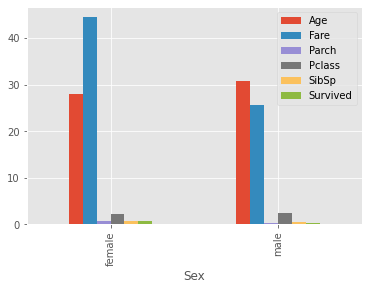

In [ ]:
table1.plot(kind='bar')

## Q2.MULTIPLE FEAUTURES
Use more than one feature as an index to group your data

In [ ]:
# multiple indexes

table2 = pd.pivot_table(df,index=['Sex','Pclass'])
table2

Age        Fare     Parch     SibSp  Survived
Sex    Pclass                                                     
female 1       34.611765  106.125798  0.457447  0.553191  0.968085
       2       28.722973   21.970121  0.605263  0.486842  0.921053
       3       21.750000   16.118810  0.798611  0.895833  0.500000
male   1       41.281386   67.226127  0.278689  0.311475  0.368852
       2       30.740707   19.741782  0.222222  0.342593  0.157407
       3       26.507589   12.661633  0.224784  0.498559  0.135447

## Q3.FUNCTIONS
 Use different aggregation function for different features

In [ ]:
#Using np.mean() for the ‘Age’ feature and np.sum() for the ‘Survived’ feature;

table3 = pd.pivot_table(df,index=['Sex','Pclass'],
                        aggfunc={'Age':np.mean,'Survived':np.sum})
table3

# EXERCISE-5: MELT
Implement melt() on the data for the count of covid cases in different countries

In [ ]:
import pandas as pd

In [ ]:
df_wide = pd.DataFrame({
   "Country": ["France", "US", "UK"],
   "22/01/2020": [1,2,3],
   "23/01/2020": [4,5,6],
   "24/01/2020": [7,8,9],
   "25/01/2020": [10,11,12],
   "26/01/2020": [13,14,15],
  }
)
df_wide

,Country,22/01/2020,23/01/2020,24/01/2020,25/01/2020,26/01/2020
0,France,1,4,7,10,13
1,US,2,5,8,11,14
2,UK,3,6,9,12,15


In [ ]:
# without any argument
df_wide.melt()

,variable,value
0,Country,France
1,Country,US
2,Country,UK
3,22/01/2020,1
4,22/01/2020,2
5,22/01/2020,3
6,23/01/2020,4
7,23/01/2020,5
8,23/01/2020,6
9,24/01/2020,7


## Q1.SINGLE ARGUMENT

In [ ]:
df_wide.melt(
    id_vars='Country',
)

,Country,variable,value
0,France,22/01/2020,1
1,US,22/01/2020,2
2,UK,22/01/2020,3
3,France,23/01/2020,4
4,US,23/01/2020,5
5,UK,23/01/2020,6
6,France,24/01/2020,7
7,US,24/01/2020,8
8,UK,24/01/2020,9
9,France,25/01/2020,10


## Q2.CUSTOM ARGUMENT

In [ ]:
#With custom name
df_wide.melt(
    id_vars='Country',
    var_name='Date',
    value_name='Cases'
)

,Country,Date,Cases
0,France,Lat,31.8257
1,US,Lat,40.0000
2,UK,Lat,55.3781
3,France,Long,117.2264
4,US,Long,-100.0000
5,UK,Long,-3.4360
6,France,22/01/2020,1.0000
7,US,22/01/2020,2.0000
8,UK,22/01/2020,3.0000
9,France,23/01/2020,4.0000


## Q3.MULTIPLE IDS

In [ ]:
#Multiple ids
df_wide = pd.DataFrame({
   "Country": ["France", "US", "UK"],
   "Lat": [31.8257, 40.0, 55.3781],
   "Long": [117.2264, -100.0, -3.436],
   "22/01/2020": [1,2,3],
   "23/01/2020": [4,5,6],
   "24/01/2020": [7,8,9],
   "25/01/2020": [10,11,12],
   "26/01/2020": [13,14,15],
  }
)
df_wide

,Country,Lat,Long,22/01/2020,23/01/2020,24/01/2020,25/01/2020,26/01/2020
0,France,31.8257,117.2264,1,4,7,10,13
1,US,40.0000,-100.0000,2,5,8,11,14
2,UK,55.3781,-3.4360,3,6,9,12,15


## Q4. SPECIFIC COLOUMNS

In [ ]:
#Specify the columns to melt
df_wide.melt(
    id_vars=['Country', 'Lat', 'Long'],
    value_vars=["24/01/2020", "25/01/2020"],
    var_name='Date',
    value_name='Cases'
)

,Country,Lat,Long,Date,Cases
0,France,31.8257,117.2264,24/01/2020,7
1,US,40.0000,-100.0000,24/01/2020,8
2,UK,55.3781,-3.4360,24/01/2020,9
3,France,31.8257,117.2264,25/01/2020,10
4,US,40.0000,-100.0000,25/01/2020,11
5,UK,55.3781,-3.4360,25/01/2020,12


In [ ]:
 #Pandas melt
 
# You can also call melt directly from pandas instead of your DataFrame. However, these are identical
pd.melt(df_wide, id_vars=['Country', 'Lat', 'Long'])

,Country,Lat,Long,variable,value
0,France,31.8257,117.2264,22/01/2020,1
1,US,40.0000,-100.0000,22/01/2020,2
2,UK,55.3781,-3.4360,22/01/2020,3
3,France,31.8257,117.2264,23/01/2020,4
4,US,40.0000,-100.0000,23/01/2020,5
5,UK,55.3781,-3.4360,23/01/2020,6
6,France,31.8257,117.2264,24/01/2020,7
7,US,40.0000,-100.0000,24/01/2020,8
8,UK,55.3781,-3.4360,24/01/2020,9
9,France,31.8257,117.2264,25/01/2020,10


# EXERCISE-6:MELT

Apply reshaping on the covid_19_cases dataset:


**Confirmed** - Cumulative number of confirmed cases till that date

**Deaths** - Cumulative number of of deaths till that date

**Recovered** - Cumulative number of recovered cases till that date

**QUES-**Use ‘Province/State’, ‘Country/Region’, ‘Lat’, ‘Long’ as identifier variables.


In [ ]:
import pandas as pd
confirmed_df = pd.read_csv('https://drive.google.com/uc?id=1skHUyIPXllFWk-wwyPUr6rC0XGBKz8mV')
deaths_df = pd.read_csv('https://drive.google.com/uc?id=1C7Vfcj7YciiPQd6N6WQWynwpWl8wUHKy')
recovered_df = pd.read_csv('https://drive.google.com/uc?id=1fQs6e-ZoUy1a6XD7ikuTsG32FnNlRcBJ')

In [ ]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,64575,65080,65486,65728,66275,66903,67743,68366,69130,70111
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,132118,132153,132176,132209,132215,132229,132244,132264,132285,132297
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,126156,126434,126651,126860,127107,127361,127646,127926,128198,128456
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13569,13569,13569,13569,13569,13664,13671,13682,13693,13693
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,31661,31909,32149,32441,32623,32933,33338,33607,33944,34180


In [ ]:
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2772,2782,2792,2802,2812,2836,2855,2869,2881,2899
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2440,2441,2442,2444,2445,2447,2447,2447,2448,2449
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,3401,3405,3411,3418,3426,3433,3440,3448,3455,3460
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,127,127,127,127,127,127,127,127,127,127
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,704,709,715,725,731,735,742,745,749,757


In [ ]:
recovered_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,55687,55790,55889,56035,56295,56518,56711,56962,57119,57281
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,127869,128425,128601,128732,128826,128907,128978,129042,129097,129215
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,87902,88066,88208,88346,88497,88672,88861,89040,89232,89419
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13234,13234,13234,13234,13234,13263,13381,13405,13416,13416
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,26483,26513,26775,26778,27087,27204,27467,27529,27577,27646


### PART-1

In [ ]:
confirmed_df_long = confirmed_df.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
    value_vars=["5/23/21", "5/24/21"], 
    var_name='Date', 
    value_name='Confirmed'
)


In [ ]:
confirmed_df_long

,Province/State,Country/Region,Lat,Long,Date,Confirmed
0,NaN,Afghanistan,33.939110,67.709953,5/23/21,65728
1,NaN,Albania,41.153300,20.168300,5/23/21,132209
2,NaN,Algeria,28.033900,1.659600,5/23/21,126860
3,NaN,Andorra,42.506300,1.521800,5/23/21,13569
4,NaN,Angola,-11.202700,17.873900,5/23/21,32441
...,...,...,...,...,...,...
547,NaN,Vietnam,14.058324,108.277199,5/24/21,5404
548,NaN,West Bank and Gaza,31.952200,35.233200,5/24/21,305777
549,NaN,Yemen,15.552727,48.516388,5/24/21,6662
550,NaN,Zambia,-13.133897,27.849332,5/24/21,93279


### PART-2

In [ ]:
deaths_df_long = deaths_df.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
    value_vars=["5/21/21", "5/22/21"], 
    var_name='Date', 
    value_name='Deaths'
)

In [ ]:
deaths_df_long 

,Province/State,Country/Region,Lat,Long,Date,Deaths
0,NaN,Afghanistan,33.939110,67.709953,5/21/21,2782
1,NaN,Albania,41.153300,20.168300,5/21/21,2441
2,NaN,Algeria,28.033900,1.659600,5/21/21,3405
3,NaN,Andorra,42.506300,1.521800,5/21/21,127
4,NaN,Angola,-11.202700,17.873900,5/21/21,709
...,...,...,...,...,...,...
547,NaN,Vietnam,14.058324,108.277199,5/22/21,42
548,NaN,West Bank and Gaza,31.952200,35.233200,5/22/21,3459
549,NaN,Yemen,15.552727,48.516388,5/22/21,1304
550,NaN,Zambia,-13.133897,27.849332,5/22/21,1267


### PART-3

In [ ]:
recovered_df_long = recovered_df.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
    value_vars=["5/26/21", "5/27/21"], 
    var_name='Date', 
    value_name='Recovered'
)

In [ ]:
recovered_df_long

,Province/State,Country/Region,Lat,Long,Date,Recovered
0,NaN,Afghanistan,33.939110,67.709953,5/26/21,56711
1,NaN,Albania,41.153300,20.168300,5/26/21,128978
2,NaN,Algeria,28.033900,1.659600,5/26/21,88861
3,NaN,Andorra,42.506300,1.521800,5/26/21,13381
4,NaN,Angola,-11.202700,17.873900,5/26/21,27467
...,...,...,...,...,...,...
517,NaN,Vietnam,14.058324,108.277199,5/27/21,2853
518,NaN,West Bank and Gaza,31.952200,35.233200,5/27/21,299559
519,NaN,Yemen,15.552727,48.516388,5/27/21,3339
520,NaN,Zambia,-13.133897,27.849332,5/27/21,91321
